# Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# Import raw waveforms

In [5]:
ecd_ts=pd.read_csv('../../TimeSeriesData/ecdTS/ecd_TS.csv')
ecd_synthetic_ts=pd.read_csv('../../TimeSeriesData/ecdTS/ecd_TS_Synthetic.csv')
unsuccessful_ts=pd.read_csv('../../TimeSeriesData/UnsuccessfulReadingsTS/US_TS.csv')

# Import raw calibration window

In [6]:
ecd_cal_org=pd.read_csv('../../WindowedTimeSeries/ecd_cal_org.csv')
syn_cal_org=pd.read_csv('../../WindowedTimeSeries/syn_cal_org.csv')
un_cal_org=pd.read_csv('../../WindowedTimeSeries/un_cal_org.csv')

# Import  normalized calibration window

In [7]:
un_cal=pd.read_csv('../../WindowedTimeSeries/un_cal.csv')
ecd_cal=pd.read_csv('../../WindowedTimeSeries/ecd_cal.csv')
syn_cal=pd.read_csv('../../WindowedTimeSeries/syn_cal.csv')

# Import predictor files

In [8]:
ecd_pred=pd.read_csv('../../RawDataPredictors/ecd_new.csv')
ecd_syn_pred=pd.read_csv('../../RawDataPredictors/Syntheticecd.csv')
un_pred=pd.read_csv('../../RawDataPredictors/Unsuccessful_new.csv')

# Loading data

In [9]:
unsuccessful_ts = unsuccessful_ts[unsuccessful_ts['TestId'].isin(un_pred['TestID'][un_pred['SampleDetectTime']!=0])]
ecd_synthetic_ts = ecd_synthetic_ts[ecd_synthetic_ts['TestId'].isin(ecd_syn_pred['TestID'][ecd_syn_pred['SampleDetectTime']!=0])]
ecd_ts = ecd_ts[ecd_ts['TestId'].isin(ecd_pred['TestID'][ecd_pred['SampleDetectTime']!=0])]
ecd_ts.shape,unsuccessful_ts.shape,ecd_synthetic_ts.shape

((246, 1501), (7019, 1501), (78, 1501))

In [10]:
unsuccessful_cal=pd.concat([un_cal,ecd_cal,syn_cal],axis=0)
unsuccessful_cal.shape

(7332, 61)

In [13]:
unsuccessful_cal_org=pd.concat([ecd_cal_org,syn_cal_org,un_cal_org])
unsuccessful_cal_org.iloc[:,1:]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.130000e-11,7.520000e-12,8.510000e-12,3.600000e-12,1.060000e-11,1.970000e-12,6.640000e-12,6.430000e-12,7.180000e-12,6.010000e-12,...,2.570000e-12,2.110000e-12,2.350000e-12,4.300000e-12,3.620000e-12,3.360000e-12,2.050000e-12,6.780000e-12,1.630000e-12,2.010000e-12
1,3.660000e-12,4.230000e-12,5.060000e-12,3.230000e-12,-1.740000e-13,4.120000e-12,5.000000e-12,3.980000e-12,4.270000e-12,-1.990000e-12,...,3.370000e-12,4.490000e-12,-1.380000e-12,2.940000e-12,3.660000e-12,-7.230000e-13,4.840000e-12,4.230000e-12,2.310000e-12,-1.600000e-12
2,4.680000e-12,3.160000e-12,3.460000e-12,1.150000e-12,3.670000e-12,-1.210000e-12,7.530000e-12,3.540000e-12,3.220000e-12,3.320000e-12,...,3.670000e-12,3.540000e-12,4.800000e-12,2.320000e-12,-1.060000e-13,3.040000e-12,2.770000e-12,4.070000e-12,2.240000e-12,-7.560000e-13
3,-5.340000e-12,3.520000e-12,-6.310000e-12,-1.390000e-12,-7.140000e-14,-3.190000e-14,6.780000e-13,-1.280000e-12,-6.440000e-13,-4.660000e-13,...,7.520000e-15,-2.240000e-12,-2.300000e-12,3.230000e-13,-2.560000e-12,-2.880000e-13,4.700000e-14,-1.650000e-12,-1.670000e-12,-1.790000e-12
4,7.460000e-12,1.300000e-12,7.280000e-12,1.140000e-12,1.290000e-11,1.630000e-11,2.290000e-12,2.070000e-12,1.990000e-12,8.090000e-12,...,-4.900000e-12,7.230000e-13,1.950000e-12,1.400000e-12,1.710000e-12,7.040000e-13,1.280000e-12,1.570000e-12,3.120000e-12,3.260000e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,-1.810000e-10,-2.030000e-10,-2.380000e-10,-2.220000e-10,-2.200000e-10,-2.170000e-10,-2.490000e-10,-2.590000e-10,-2.700000e-10,-2.410000e-10,...,-4.760000e-10,-6.050000e-10,-6.130000e-10,-6.140000e-10,-5.120000e-10,-6.420000e-10,-6.490000e-10,-5.370000e-10,-6.590000e-10,-6.760000e-10
7006,-7.720000e-10,-8.400000e-10,-8.800000e-10,-8.140000e-10,-8.820000e-10,-8.670000e-10,-8.400000e-10,-8.590000e-10,-9.020000e-10,-9.030000e-10,...,-1.020000e-09,-1.060000e-09,-1.010000e-09,-1.040000e-09,-1.030000e-09,-1.040000e-09,-1.050000e-09,-1.050000e-09,-1.050000e-09,-1.040000e-09
7007,-4.200000e-10,-3.040000e-10,-1.850000e-10,-2.510000e-10,-2.650000e-10,-2.790000e-10,-3.310000e-10,-1.750000e-10,-3.140000e-10,-3.510000e-10,...,-5.120000e-10,-6.220000e-10,-6.470000e-10,-6.700000e-10,-6.870000e-10,-7.370000e-10,-7.040000e-10,-6.960000e-10,-7.020000e-10,-7.080000e-10
7008,-1.600000e-10,-1.510000e-10,-2.390000e-10,-1.790000e-10,-1.830000e-10,-2.890000e-10,-2.190000e-10,-2.130000e-10,-3.180000e-10,-2.500000e-10,...,-6.830000e-10,-5.950000e-10,-6.330000e-10,-7.240000e-10,-6.130000e-10,-6.000000e-10,-6.380000e-10,-7.370000e-10,-7.230000e-10,-6.110000e-10


In [14]:
unsuccessful_cal_out=unsuccessful_cal[~unsuccessful_cal.TestId.isin([9610462, 9610647])]
ecd_cal_out=ecd_cal[~ecd_cal.TestId.isin([9610462, 9610647])]

In [17]:
ts_list=unsuccessful_cal.iloc[:,1:].values.tolist()

In [16]:
ts_list_out=unsuccessful_cal_out.iloc[:,1:-1].values.tolist()

In [26]:
ts_list_org=unsuccessful_cal_org.iloc[:,1:].values.tolist()

# Calling minisom

In [18]:
def minisom_func(ts_list,som_x,som_y,sigma,activation_distance,learning_rate,epochs,neighborhood_function):
    som_x=som_x
    som_y=som_y
    som = MiniSom(som_x,som_y,len(ts_list[0]),sigma=sigma,learning_rate=learning_rate,activation_distance=activation_distance,neighborhood_function=neighborhood_function)
    som.random_weights_init(ts_list)
    print("Training...")
    som.train_random(ts_list,epochs) # random training
    print("\n...ready!")

    return som

In [19]:
def create_cluter_map(ts_list,parameters,unsuccessful_df,ecd,syn,un):
    
    som=minisom_func(ts_list,parameters['som_x'],parameters['som_y'],\
                     parameters['sigma'],parameters['activation_distance'],parameters['learning_rate'],parameters['epochs'],parameters['neighborhood_function'])
    win_map=som.win_map(ts_list)
    
    cluster_c = []
    cluster_n = []

    for x in range(parameters['som_x']):
        for y in range(parameters['som_y']):
            cluster = (x,y)
            if cluster in win_map.keys():
                cluster_c.append(len(win_map[cluster]))
            else:
                cluster_c.append(0)
            cluster_number = x*parameters['som_y']+y+1
            cluster_n.append(f"Cluster {cluster_number}")

    plt.figure(figsize=(10,5))
    plt.title("Cluster Distribution for SOM")
    plt.bar(cluster_n,cluster_c,width=0.5)
    plt.show()

    cluster_map = []
    for idx in range(len(ts_list)):
        winner_node = som.winner(ts_list[idx])
        cluster_number=winner_node[0]*parameters['som_y']+winner_node[1]+1
        cluster_map.append(cluster_number)
        
    unsuccessful_df['cluster']=cluster_map
    ecd_cluster=unsuccessful_df.merge(ecd,on='TestId')['cluster'].value_counts()/unsuccessful_df.merge(ecd,on='TestId')['cluster'].value_counts().sum()
    syn_cluster=unsuccessful_df.merge(syn,on='TestId')['cluster'].value_counts()/unsuccessful_df.merge(syn,on='TestId')['cluster'].value_counts().sum()
    un_cluster=unsuccessful_df.merge(un,on='TestId')['cluster'].value_counts()/unsuccessful_df.merge(un,on='TestId')['cluster'].value_counts().sum()
    return (ecd_cluster,syn_cluster,un_cluster)

Training...

...ready!


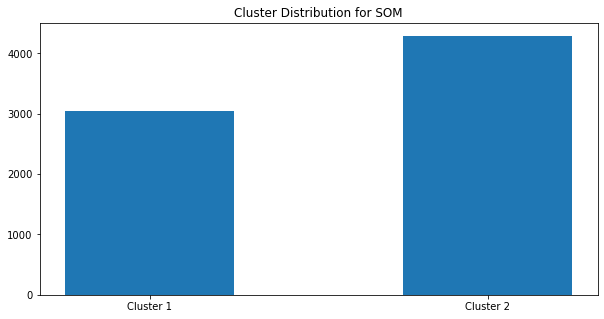

2    0.79918
1    0.20082
Name: cluster, dtype: float64 
 2    0.794872
1    0.205128
Name: cluster, dtype: float64 
 2    0.5752
1    0.4248
Name: cluster, dtype: float64


In [28]:
parameters={'som_x':1,'som_y':2,'sigma':0.5,'activation_distance':'manhattan',\
            'learning_rate':0.01,'epochs':5000,'neighborhood_function':'gaussian'}
ecd_cluster,syn_cluster,un_cluster=create_cluter_map(ts_list,parameters,\
                                                     unsuccessful_cal,ecd_cal_out,syn_cal,un_cal)

print(ecd_cluster,'\n',syn_cluster,'\n',un_cluster)

## Results:
The clustering was performed on three datasets:
- The raw calibration waveforms
- The normalized calibration waveforms
- The normalized calibration waveforms with outliers in ecd removed

The best results in SOM clustering can be obtained in normalized calibration waveforms with / without outliers removed. <br>
The results were bad on the original waveforms